In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString



In [230]:
df_fire = pd.read_csv('data/ca_daily_fire_2000_03252022.csv')
df_travel = pd.read_csv('data/california_jul_nov_2019.csv', index_col=0)

In [231]:
df_travel

,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
geoid_o,,,,,,,,
6037,6037,-118.261017,34.198001,-118.261017,34.198001,2019-07-23,1034193,20735310.0
6037,6059,-118.261017,34.198001,-117.776146,33.676913,2019-07-23,28948,580400.0
6037,6065,-118.261017,34.198001,-115.993849,33.743680,2019-07-23,5916,118614.0
6037,6071,-118.261017,34.198001,-116.178461,34.841438,2019-07-23,12652,253669.0
6037,6001,-118.261017,34.198001,-121.917885,37.650547,2019-07-23,703,14094.0
...,...,...,...,...,...,...,...,...
6049,6103,-120.725029,41.589834,-122.233885,40.125736,2019-11-06,1,21.0
6049,6067,-120.725029,41.589834,-121.344243,38.449315,2019-11-06,3,64.0
6049,6035,-120.725029,41.589834,-120.594333,40.673590,2019-11-06,17,363.0


In [232]:
df_fire = df_fire[df_fire['acq_date']>= '2019-07-23']
df_fire = df_fire[df_fire['acq_date']<= '2019-10-01']

In [233]:
df_fire

,latitude,longitude,acq_date,satellite,instrument,confidence,year,month
238,32.539585,-114.619484,2019-08-12,N,VIIRS,50,2019,8
253,32.543243,-114.613960,2019-08-12,N,VIIRS,50,2019,8
258,32.544514,-114.618759,2019-08-12,N,VIIRS,50,2019,8
283,32.549419,-116.996498,2019-08-01,N,VIIRS,100,2019,8
291,32.550823,-117.004608,2019-08-01,N,VIIRS,50,2019,8
...,...,...,...,...,...,...,...,...
1113546,41.977900,-114.175300,2019-08-05,Terra,MODIS,70,2019,8
1113786,41.979300,-114.160400,2019-08-06,Aqua,MODIS,100,2019,8
1113823,41.979500,-114.188700,2019-08-05,Terra,MODIS,64,2019,8
1114090,41.981000,-114.147900,2019-08-06,Aqua,MODIS,100,2019,8


In [234]:
# GeoDataFrame for travel data
geometry_travel = [LineString([(row['lng_o'], row['lat_o']), (row['lng_d'], row['lat_d'])]) for idx, row in df_travel.iterrows()]
gdf_travel = gpd.GeoDataFrame(df_travel, geometry=geometry_travel)

# GeoDataFrame for fire data
geometry_fire = [Point(xy) for xy in zip(df_fire['longitude'], df_fire['latitude'])]
gdf_fire = gpd.GeoDataFrame(df_fire, geometry=geometry_fire)

# Buffer around the fires
gdf_fire['geometry'] = gdf_fire.geometry.buffer(0.05)

# spatial join to find travel routes intersecting with fires
join_result = gpd.sjoin(gdf_travel, gdf_fire, how="inner", op="intersects")

# Store the intersecting fire locations for each travel route
join_result['fire_location'] = list(zip(join_result['longitude'], join_result['latitude']))


/Users/luisquinonespr/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


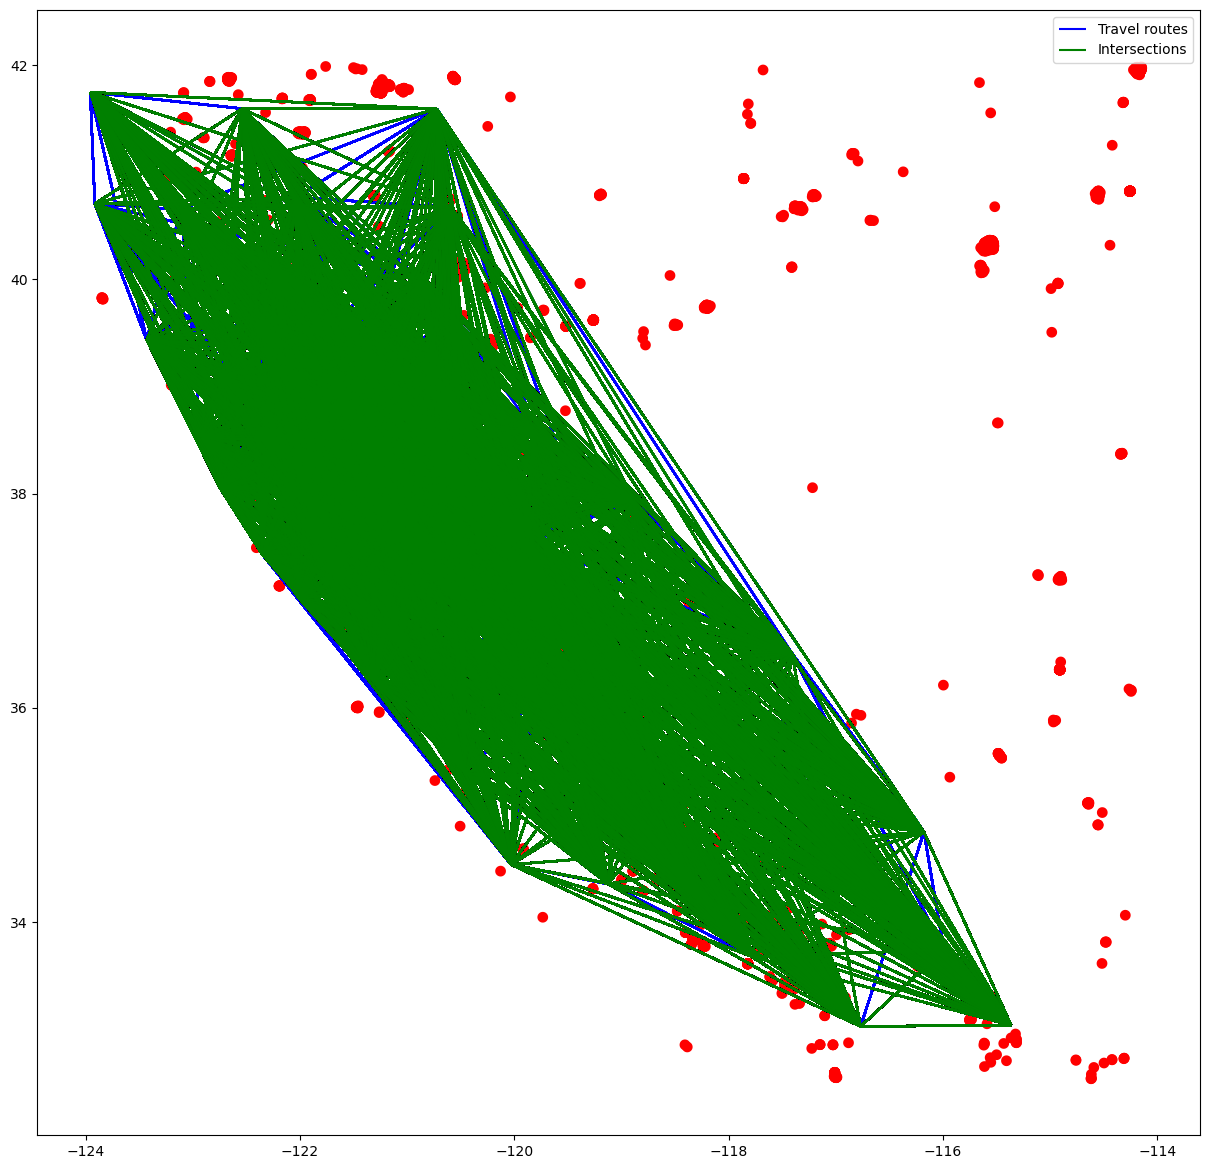

In [235]:

# Plot the data
fig, ax = plt.subplots(figsize=(15, 15))
gdf_travel.plot(ax=ax, color='blue', label='Travel routes')
gdf_fire.plot(ax=ax, color='red', markersize=10, label='Fire locations')
join_result.geometry.plot(ax=ax, color='green', label='Intersections')

plt.legend()
plt.show()

In [238]:
join_result.drop_duplicates(inplace=True)